In [2]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl
import matplotlib.colors as mcolors

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape
# filter to match
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [4]:
def load_run(n_components, date):
    clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
    clusters_ambig =  pd.read_csv("output/cluster_"+str(n_components)+"_ambiguousNaN_"+date+".csv", index_col=0)
    mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
    symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)
    preddf = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_preddf.csv", index_col=0)
    file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

    with open(file_path, 'rb') as file:
        model = pkl.load(file)
    return({"clusters": clusters, "mm": mm, "symp_unusual": symp_unusual, "model": model, 'clusters_ambig': clusters_ambig, 'preddf':preddf})

In [5]:
n_components = 13
date = "111023"

res13 = load_run(n_components, date)

In [6]:
res13.keys()

dict_keys(['clusters', 'mm', 'symp_unusual', 'model', 'clusters_ambig', 'preddf'])

In [7]:
preddf = res13['preddf']

In [8]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(preddf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6031 samples in 0.005s...
[t-SNE] Computed neighbors for 6031 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6031
[t-SNE] Computed conditional probabilities for sample 2000 / 6031
[t-SNE] Computed conditional probabilities for sample 3000 / 6031
[t-SNE] Computed conditional probabilities for sample 4000 / 6031
[t-SNE] Computed conditional probabilities for sample 5000 / 6031
[t-SNE] Computed conditional probabilities for sample 6000 / 6031
[t-SNE] Computed conditional probabilities for sample 6031 / 6031
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.999908
[t-SNE] KL divergence after 1000 iterations: 0.573407


In [21]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_lda = tsne_model.fit_transform(preddf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6031 samples in 0.003s...
[t-SNE] Computed neighbors for 6031 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6031
[t-SNE] Computed conditional probabilities for sample 2000 / 6031
[t-SNE] Computed conditional probabilities for sample 3000 / 6031
[t-SNE] Computed conditional probabilities for sample 4000 / 6031
[t-SNE] Computed conditional probabilities for sample 5000 / 6031
[t-SNE] Computed conditional probabilities for sample 6000 / 6031
[t-SNE] Computed conditional probabilities for sample 6031 / 6031
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.011501
[t-SNE] KL divergence after 1000 iterations: 0.462229


In [22]:
plotdf = pd.DataFrame(tsne_lda, index=preddf.index, columns = ["tsne_1","tsne_2"])
plotdf['clusters'] = res13["clusters"]

In [30]:
plotdf.to_csv("output/tsne_components.csv")

<Axes: title={'center': 't-SNE Clustering of inferred 13 stepmix components '}, xlabel='tsne_1', ylabel='tsne_2'>

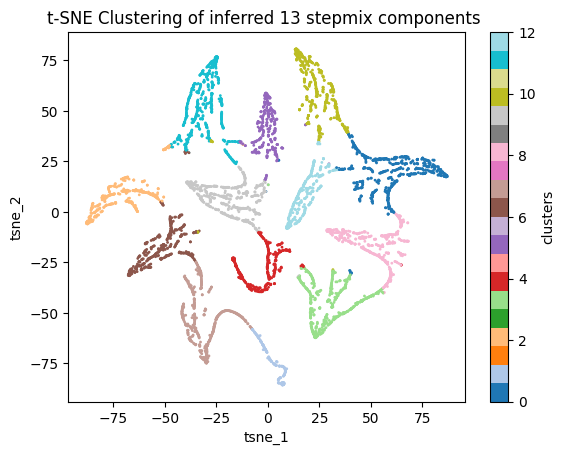

In [23]:
plotdf.plot.scatter(x='tsne_1', y='tsne_2', c='clusters', colormap='tab20', title= "t-SNE Clustering of inferred {} stepmix components ".format(n_components),
                    s=1)

In [24]:
combined_clusters = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)

In [25]:
plotdf = pd.DataFrame(tsne_lda, index=preddf.index, columns = ["tsne_1","tsne_2"])
plotdf['clusters'] = res13["clusters"]

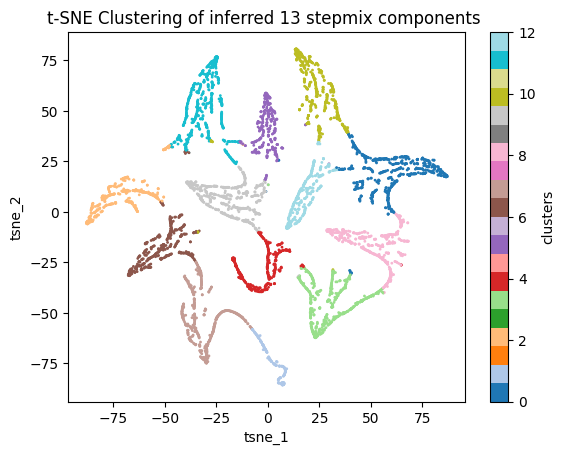

In [29]:
plotdf.plot.scatter(x='tsne_1', y='tsne_2', c='clusters', colormap='tab20', title= "t-SNE Clustering of inferred {} stepmix components ".format(n_components),
                    s=1)
plt.savefig('figs/clusprob_tsne_stepmix_'+str(n_components)+'_'+date+'.pdf', dpi=300)  # saves the current figure

# same plot with smaller poitns


In [27]:
plotdf['clus_combined'] =  combined_clusters['cluster']

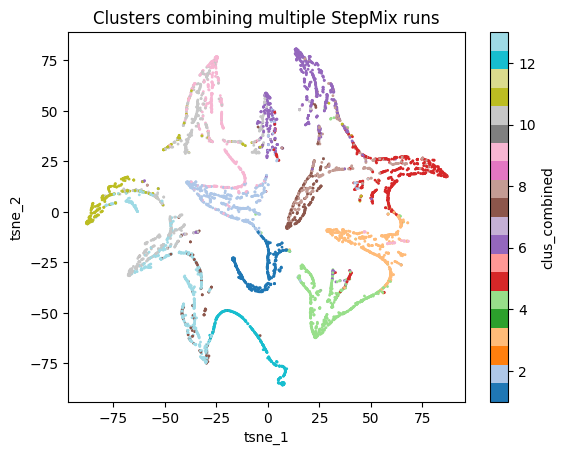

In [28]:
plotdf.plot.scatter(x='tsne_1', y='tsne_2', c='clus_combined', colormap='tab20', title= "Clusters combining multiple StepMix runs".format(n_components),
                    s=1)
plt.savefig('figs/clusprob_tsne_stepmix_combined.pdf', dpi=300)  # saves the current figure


9
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6031 samples in 0.002s...
[t-SNE] Computed neighbors for 6031 samples in 0.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6031
[t-SNE] Computed conditional probabilities for sample 2000 / 6031
[t-SNE] Computed conditional probabilities for sample 3000 / 6031
[t-SNE] Computed conditional probabilities for sample 4000 / 6031
[t-SNE] Computed conditional probabilities for sample 5000 / 6031
[t-SNE] Computed conditional probabilities for sample 6000 / 6031
[t-SNE] Computed conditional probabilities for sample 6031 / 6031
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.584808
[t-SNE] KL divergence after 1000 iterations: 0.503819
11
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6031 samples in 0.001s...
[t-SNE] Computed neighbors for 6031 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6031
[t-SNE] Computed conditi

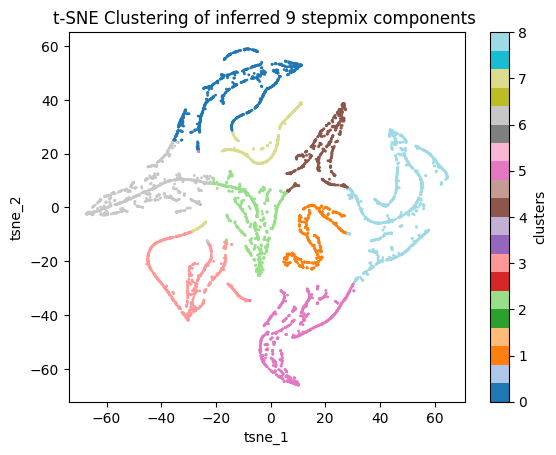

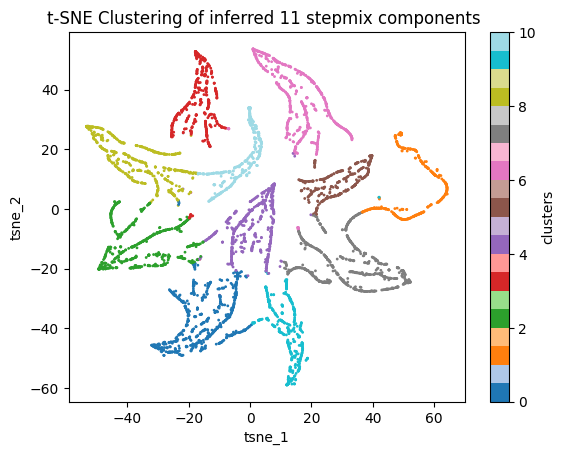

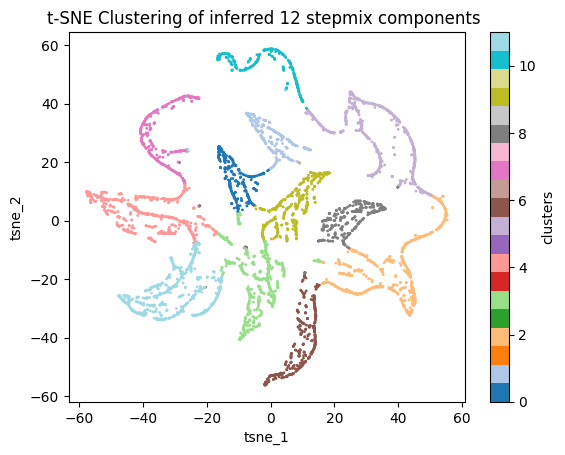

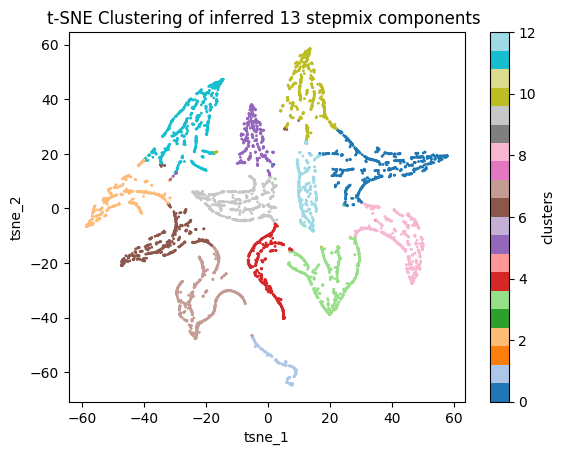

In [56]:
# now repeat for the loadings 
for n_components in [9,11,12,13]:
    print(n_components)
    res= load_run(n_components, date) 
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_comps = tsne_model.fit_transform(res['preddf'])
    plotdf = pd.DataFrame(tsne_comps, index=res['preddf'].index, columns = ["tsne_1","tsne_2"])
    plotdf['clusters'] = res["clusters"]
    plotdf.to_csv("output/stepmix_"+str(n_components)+"_"+date+"_plotdf.csv")
    plotdf.plot.scatter(x='tsne_1', y='tsne_2', c='clusters', colormap='tab20', title= "t-SNE Clustering of inferred {} stepmix components ".format(n_components),
                    s=1)
    plt.savefig('output/clusprob_tsne_stepmix_'+str(n_components)+"_"+date+'.pdf', dpi=300)  # saves the current figure


In [1]:
tsne_comps

NameError: name 'tsne_comps' is not defined